In [4]:
import cv2
import numpy as np
import os
import pandas as pd


In [ ]:
#########################################################
# 方法1,opencv
#########################################################

In [57]:

# 读取图像
imagePath = './rock/64-2.bmp'
img = cv2.imread(imagePath)
#cv2.imshow("images", img)
#cv2.waitKey(0)

#元组：RGB
black_upper = [20, 20, 20]
black_lower = [0, 0, 0]
green = [0, 0, 0]
# 中心颜色rgb的上下浮动值
# diff元组上下浮动值
diff = 20

# opencv以BGR格式加载图像,这里调整为BGR的顺序:
boundaries = [([black_lower[2], black_lower[1], black_lower[0]],
           [black_upper[2], black_upper[1], black_upper[0]])]
# 大图像缩小比列:
scalePercent = 0.3

# 计算新图像的大小
width = int(img.shape[1] * scalePercent)
height = int(img.shape[0] * scalePercent)
newSize = (width, height)

# 调整图像大小:
img = cv2.resize(img, newSize, None, None, None, cv2.INTER_AREA)

# 查看调整大小的图像:
#cv2.imshow("img resized", img)
#cv2.waitKey(0)

In [58]:
# for each range in your boundary list:
for (lower, upper) in boundaries:

    # 间隔的上下部分:
    lower = np.array(lower, dtype=np.uint8)
    upper = np.array(upper, dtype=np.uint8)

    # cv2.inRange用于对图像进行二值化（即，以白色/黑色渲染）
    # 所有落在间隔[lower，uipper]内的像素都将是白色的
    # 所有不在此间隔内的像素将
    # 对于所有三个通道，将以黑色呈现：
    mask = cv2.inRange(img, lower, upper)

    # 查看二值化后的mask:
    cv2.imshow("binary mask", mask)
    cv2.waitKey(0)
    #print(mask.size)


    #使用mask来计算白色像素的数量,
    #除以图像大小，得到原始图像中绿色像素的百分比
    
    ratio_green = 1-(cv2.countNonZero(mask)/(img.size/3))
    
    # 输出颜色百分比,保留小数点后2位数字
    print('green pixel percentage:', np.round(ratio_green*100, 2))


green pixel percentage: 12.3


In [ ]:
#########################################################

In [18]:
#########################################################
# 方法2,knn
#########################################################
import argparse
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


In [46]:
def centroid_histogram(clt):
    # 获取不同聚簇的个数，根据每个聚簇的像素数生成直方图
    # k均值算法将图像中的每个像素分配给最近的聚类。
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    # 对直方图进行归一化，使得总和为1
    hist = hist.astype("float")
    hist /= hist.sum()

    # 返回直方图
    return hist

# plot_colors函数需要两个参数：
# hist，它是从centroid_histogram函数生成的直方图；
# centroids，是由k-means算法生成的质心（集群中心）的列表。
def plot_colors(hist, centroids):
    # 初始化代表相对频率的每种颜色的条形图
    # 定义了一个300×50像素的矩形，以容纳图像中最主要的颜色
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    # 遍历每一个聚簇的百分比及颜色
    for (percent, color) in zip(hist, centroids):
        # 绘制每一聚簇的相对百分比
        print(percent)
        print(color)
        endX = startX + (percent * 300)

        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # 返回条形图
    return bar

KMeans(n_clusters=2)

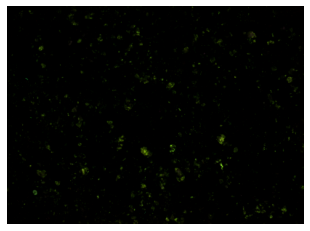

In [47]:
# 加载图像，转换BGR-->RGB 以在matplotlib展示
image = cv2.imread('./rock/1-2.bmp')
# 大图像缩小比列:
scalePercent = 0.1
# 计算新图像的大小
width = int(image.shape[1] * scalePercent)
height = int(image.shape[0] * scalePercent)
newSize = (width, height)

# 调整图像大小:
image = cv2.resize(image, newSize, None, None, None, cv2.INTER_AREA)


image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# 展示图像
plt.figure()
plt.axis("off")
plt.imshow(image)

# 将NumPy数组重塑为RGB像素列表
image = image.reshape((image.shape[0] * image.shape[1], 3))

# 使用scikit-learn中的K-means实现来避免重新实现该算法
# 使用K-means查找图像中最主要的颜色
# 使用期望获取的聚簇数，初始化局KMeans类，调用fit()方法将像素列表聚集在一起
clt = KMeans(n_clusters=2)
clt.fit(image)



0.9755256723716381
[0.54386493 1.01799544 0.0716977 ]
0.02447432762836186
[27.17349317 42.67832168  3.45820846]


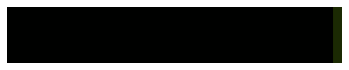

In [48]:
# 构建聚簇直方图
# 建立图表以代表每一种颜色所对应的像素数
hist = centroid_histogram(clt)

bar = plot_colors(hist, clt.cluster_centers_)

# 展示颜色条形图
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()